# Stock

In [1]:
import warnings
warnings.filterwarnings('ignore')

from datetime import datetime
import time
import json
import re

# Flexible and powerful data analysis / manipulation library for Python, providing labeled data structures similar to R data.frame objects, statistical functions, and much more
import pandas as pd
import pandas_datareader as pdr
import pandas_datareader.data as web

# The fundamental package for scientific computing with Python.
import numpy as np

# Prophet is a forecasting procedure implemented in R and Python. It is fast and provides completely automated forecasts that can be tuned by hand by data scientists and analysts.
from fbprophet import Prophet

# A Fast, Extensible Progress Bar for Python and CLI
from tqdm import tqdm

# matplotlib: plotting with Python.
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.font_manager
import mpl_finance
%matplotlib inline

# A module for finding, managing, and using fonts across platforms.
mpl.font_manager._rebuild()
sorted([f.name for f in mpl.font_manager.fontManager.ttflist if f.name.startswith('Malgun')])

# 폰트 설정
mpl.rc('font', family='Malgun Gothic')

# 유니코드에서  음수 부호설정
mpl.rc('axes', unicode_minus=False)

Importing plotly failed. Interactive plots will not work.


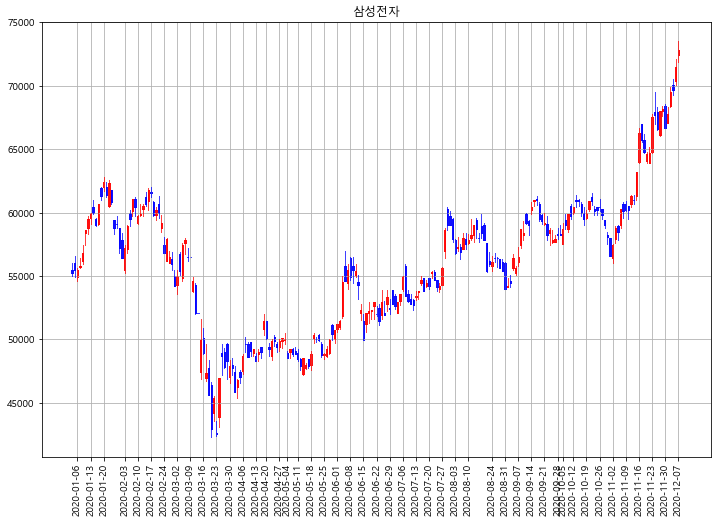

In [2]:
start_date = datetime(2020, 1, 1)
end_date = datetime(2020, 12, 7)
stock = pdr.DataReader('005930.KS', data_source='yahoo', start=start_date, end=end_date)

fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

day_list = []
name_list = []
for i, day in enumerate(stock.index):
    if day.dayofweek == 0:
        day_list.append(i)
        # name_list.append(day.strftime('%Y-%m-%d') + '(Mon)')
        name_list.append(day.strftime('%Y-%m-%d'))

ax.xaxis.set_major_locator(ticker.FixedLocator(day_list))
ax.xaxis.set_major_formatter(ticker.FixedFormatter(name_list))

mpl_finance.candlestick2_ohlc(ax, stock['Open'], stock['High'], stock['Low'], stock['Close'], width=0.5, colorup='r', colordown='b')

plt.xticks(rotation=90)
plt.grid()

plt.title('삼성전자')
plt.show()

In [3]:
stock_trunc = stock[:'2020-12-07']
stock_trunc.tail()

df = pd.DataFrame({'ds': stock_trunc.index, 'y': stock_trunc.Close})
df = df.reset_index()[['ds', 'y']]
df.head()

,ds,y
0,2020-01-02,55200
1,2020-01-03,55500
2,2020-01-06,55500
3,2020-01-07,55800
4,2020-01-08,56800


INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


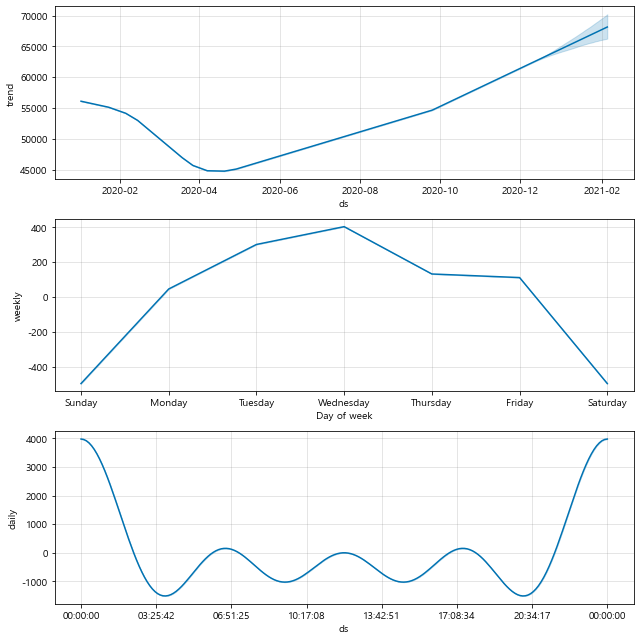

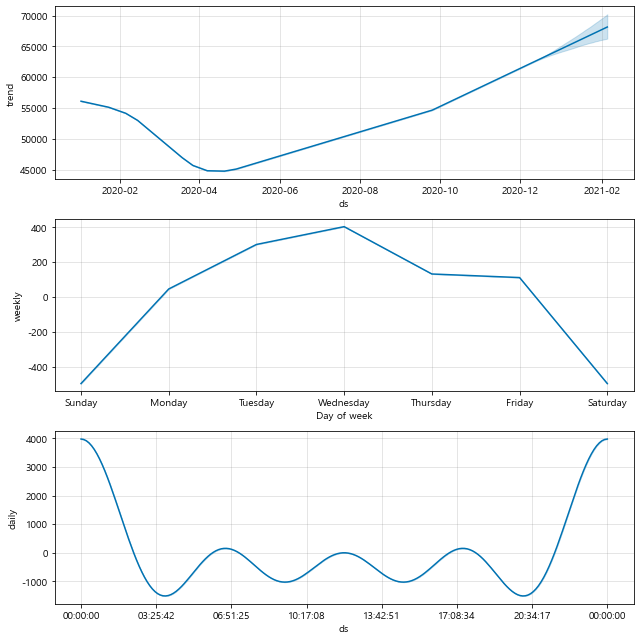

In [4]:
model = Prophet(daily_seasonality=True)
model.fit(df)

future = model.make_future_dataframe(periods=60)
forecast = model.predict(future)

model.plot_components(forecast)

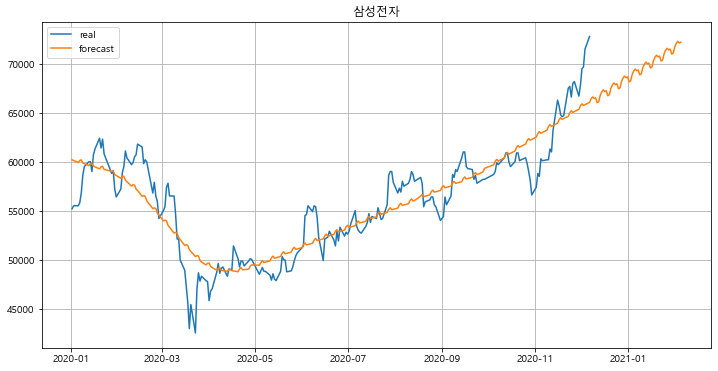

In [5]:
plt.figure(figsize=(12,6))

plt.plot(stock.index, stock.Close, label='real')
plt.plot(forecast.ds, forecast.yhat, label='forecast')

plt.title('삼성전자')
plt.grid()
plt.legend()
plt.show()